In [1]:
import numpy
from matplotlib import pyplot
import math
%matplotlib inline

In [2]:
x_sources = numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_x.txt')
y_sources = numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_y.txt')
sigmas = numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_sigma.txt')

In [3]:
x = numpy.linspace(-1,2,51)
y = numpy.linspace(-0.5,0.5,51)
X,Y = numpy.meshgrid(x,y)

In [4]:
u = 0
v = 0
psi = 0

for i in range (100):
    u_linshi = sigmas[i]/(2*math.pi) * (X-x_sources[i])/((X-x_sources[i])**2 + (Y - y_sources[i])**2)
    v_linshi = sigmas[i]/(2*math.pi) * (Y-y_sources[i])/((X-x_sources[i])**2 + (Y - y_sources[i])**2)
    psi_linshi = sigmas[i]/(2*math.pi) * numpy.arctan2(Y-y_sources[i], X-x_sources[i])
    
    u = u+u_linshi
    v = v+v_linshi
    psi = psi+psi_linshi

In [5]:
u = u+1
v = v+0
psi = psi+Y

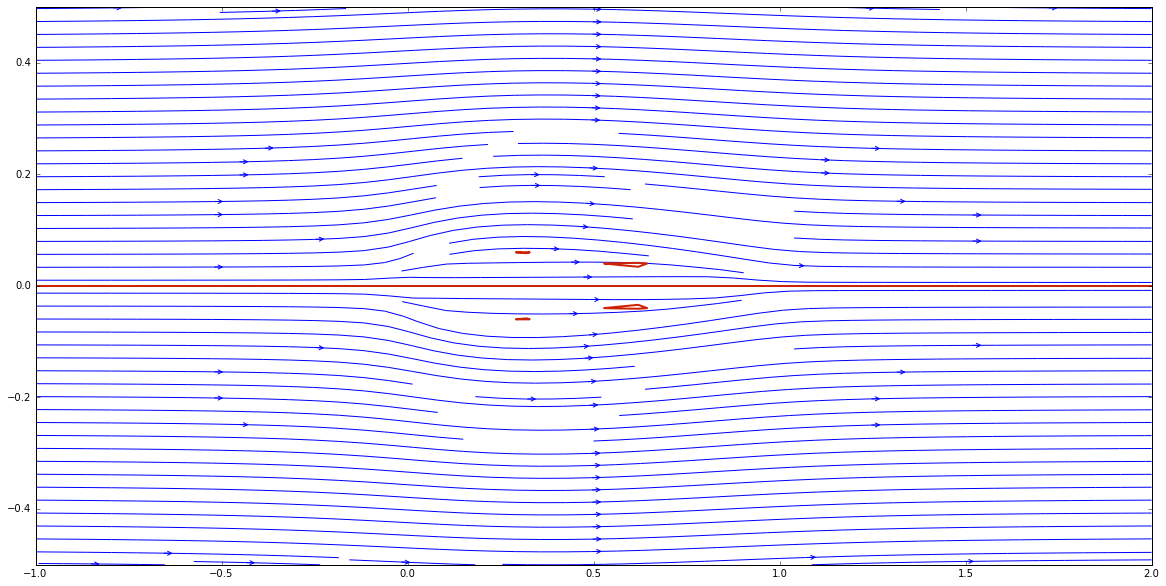

In [7]:
pyplot.figure(figsize=(20,10))
pyplot.streamplot(X, Y, u, v, density=1.5, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.xlim(-1,2)
pyplot.ylim(-0.5,0.5)
pyplot.contour(X, Y, psi, 
            levels=[-0,], 
            colors='#CD2305', linewidths=2, linestyles='solid');

In [8]:
u_inf = 1
cp = 1.0 - (u**2+v**2)/u_inf**2

In [13]:
numpy.shape(cp)

(51, 51)

In [14]:
numpy.max(cp)

0.47144366133162408

In [15]:
numpy.where(cp == numpy.max(cp))

(array([25], dtype=int64), array([16], dtype=int64))

In [16]:
cp[25]

array([ 0.01657806,  0.01819501,  0.02006957,  0.02226129,  0.02484847,
        0.027936  ,  0.03166732,  0.03624335,  0.0419538 ,  0.04923088,
        0.0587473 ,  0.07160713,  0.08975214,  0.11693529,  0.1614782 ,
        0.24643606,  0.47144366, -0.55237083, -0.47415081, -0.43314611,
       -0.397783  , -0.36374226, -0.32992233, -0.29637134, -0.26333749,
       -0.23067893, -0.1987381 , -0.16680825, -0.13469811, -0.10143868,
       -0.06533765, -0.02009877,  0.03858894,  0.1408671 ,  0.1811216 ,
        0.11057108,  0.08069093,  0.06311142,  0.05135125,  0.04289983,
        0.03653603,  0.03158196,  0.02762696,  0.02440617,  0.02174053,
        0.01950442,  0.01760703,  0.01598108,  0.01457569,  0.01335165,
        0.01227832])

NameError: name 'x_source' is not defined

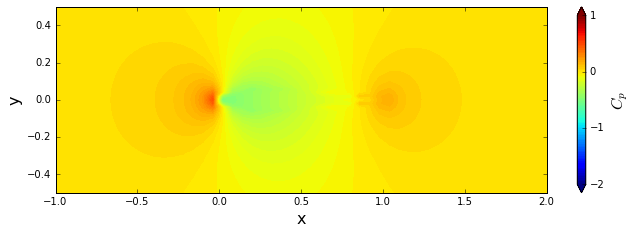

In [11]:
size = 10
pyplot.figure(figsize=(1.1*size, 1/3*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-1, 2)
pyplot.ylim(-0.5, 0.5)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter([x_source, x_sink], [y_source, y_sink], color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');

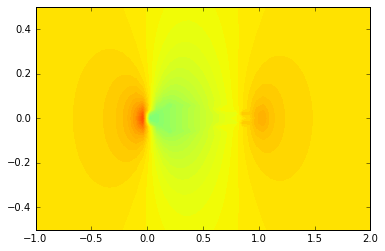

In [12]:
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')